# Visualization


## Setup

From time to time, we will need to install some additional packages. For visualization, we can use Matplotlib, Seaborn, Plotly, Altair, etc. If you're using Google Colab, Deepnote, or another cloud-based notebook, they may already have the package installed. 

As an example, you can install package from juptyer notebook by running the following command:

In [1]:
# uncomment to install
# %conda install seaborn
# %pip install seaborn

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

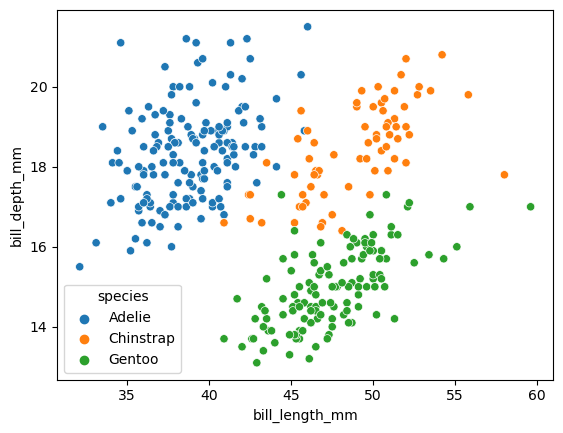

In [2]:
# test your seaborn installation
import seaborn as sns
df = sns.load_dataset("penguins")
sns.scatterplot(
    data = df,
    x = "bill_length_mm",
    y = "bill_depth_mm",
    hue = "species"
)

## Visualizing the data using Altair

To make visualizations in all of these libraries, we encode columns in the dataset to various visual channels in the chart.

* Plot this data using a scatter plot (denoted by `mark_circle()` in Altair).  Encode the "weight" column in the x-coordinate, the "mpg" column in the y-coordinate.

`alt.Chart(df)`: This creates a new chart object using the dataframe `df`. The `df` dataframe should contain the data you want to visualize.

`.mark_circle()`: This tells Altair to represent data points as circles. It specifies the type of mark for the visualization. Altair supports a variety of marks such as `mark_bar()`, `mark_line()`, and so on.

`.encode()`: This function defines the mapping between data columns and visual encoding channels. The arguments within this function determine which column of the dataframe corresponds to which axis or aspect of the chart.

`x = "bill_length_mm"`: This sets the x-axis to the "bill_length_mm" column of the df dataframe.

`y = "bill_depth_mm"`: This sets the y-axis to the "bill_depth_mm" column of the df dataframe.

In [3]:
import altair as alt
alt.Chart(df).mark_circle().encode(
    x = alt.X("bill_length_mm",scale=alt.Scale(domain=(30, 60))),
    y = alt.X("bill_depth_mm",scale=alt.Scale(domain=(12, 22))),
    color = "species"
)


alt.Chart(...)

Notice how if you move your mouse over a point in the chart, you will see all the requested information. Each drawn point should be thought of as corresponding to one row in the original DataFrame.

a tooltip provides supplementary information about a data point when you hover over it. You can specify which columns from your dataframe should be displayed in the tooltip. 


In [4]:
alt.Chart(df).mark_circle().encode(
    x = alt.X("bill_length_mm",scale=alt.Scale(domain=(30, 60))),
    y = alt.X("bill_depth_mm",scale=alt.Scale(domain=(12, 22))),
    color = "species",
    tooltip = ["species", "bill_length_mm", "bill_depth_mm", "island", "sex"]
)

alt.Chart(...)

Interactive plot with selection and bar chart.

In [15]:
brush = alt.selection_interval()

c1 = alt.Chart(df).mark_point().encode(
    x = alt.X("bill_length_mm",scale=alt.Scale(domain=(30, 60))),
    y = alt.X("bill_depth_mm",scale=alt.Scale(domain=(12, 22))),
    color = "species:N",
    tooltip = ["species", "bill_length_mm", "bill_depth_mm", "island", "sex"]
).add_params(brush)

c2 = alt.Chart(df).mark_bar().encode(
    x="species:N",
    y="count()"
).transform_filter(brush)

c1|c2

alt.HConcatChart(...)

## Visualizing the data using Plotly Express

* Make a similar chart using Plotly Express.

Plotly Express, a part of the Plotly library, is designed for interactive visualizations, and it supports tooltips.

In [6]:
import plotly.express as px
px.scatter(
    data_frame=df,
    x = "bill_length_mm",
    y = "bill_depth_mm",
    color = "species",
    hover_data = ["species", "bill_length_mm", "bill_depth_mm", "island"]
)

# Visualizing the Distribution

See [example](https://seaborn.pydata.org/tutorial/distributions.html)


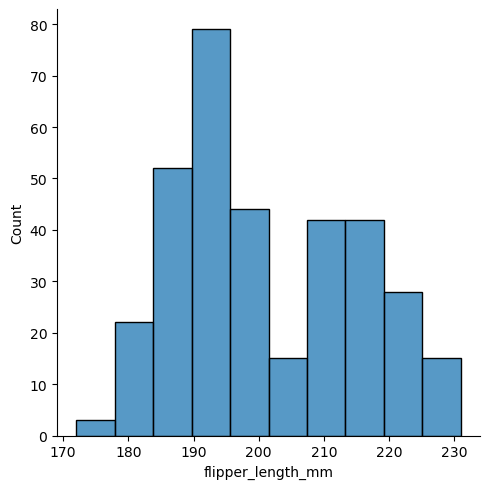

In [7]:
sns.displot(df, x="flipper_length_mm")

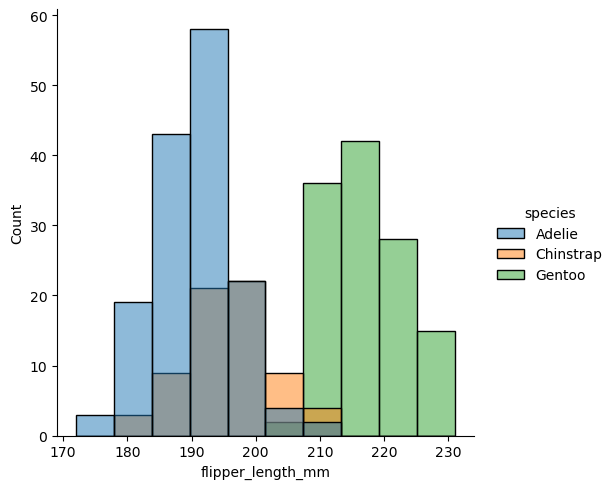

In [8]:
sns.displot(df, x="flipper_length_mm", hue="species")


<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

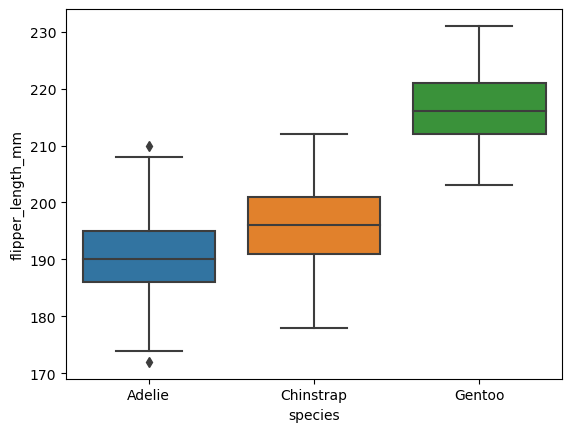

In [9]:
# boxplot shows the median, 25th and 75th percentile, and outliers
sns.boxplot(data=df, x="species", y="flipper_length_mm")

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

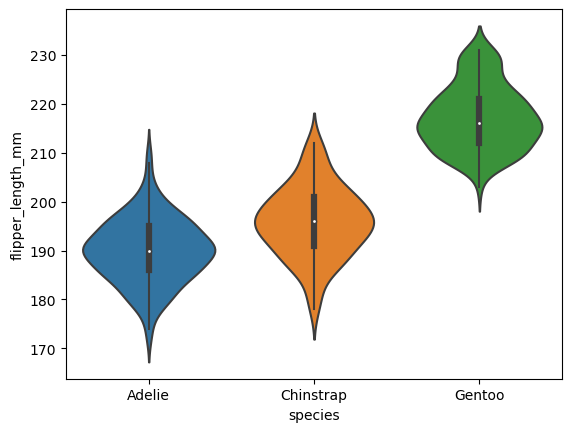

In [10]:
# violin plot shows the density estimate of the underlying distribution
sns.violinplot(data=df, x="species", y="flipper_length_mm")

# Visualizing the covariance matrix

<AxesSubplot:>

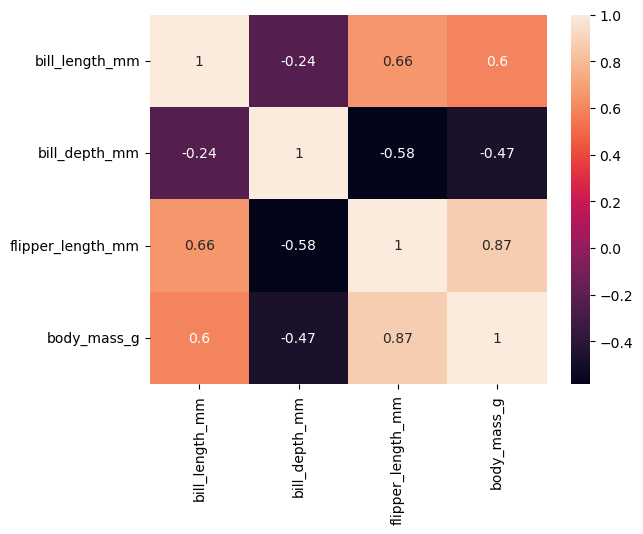

In [11]:
# compute the correlation matrix
corr = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].corr()

sns.heatmap(corr, annot=True)

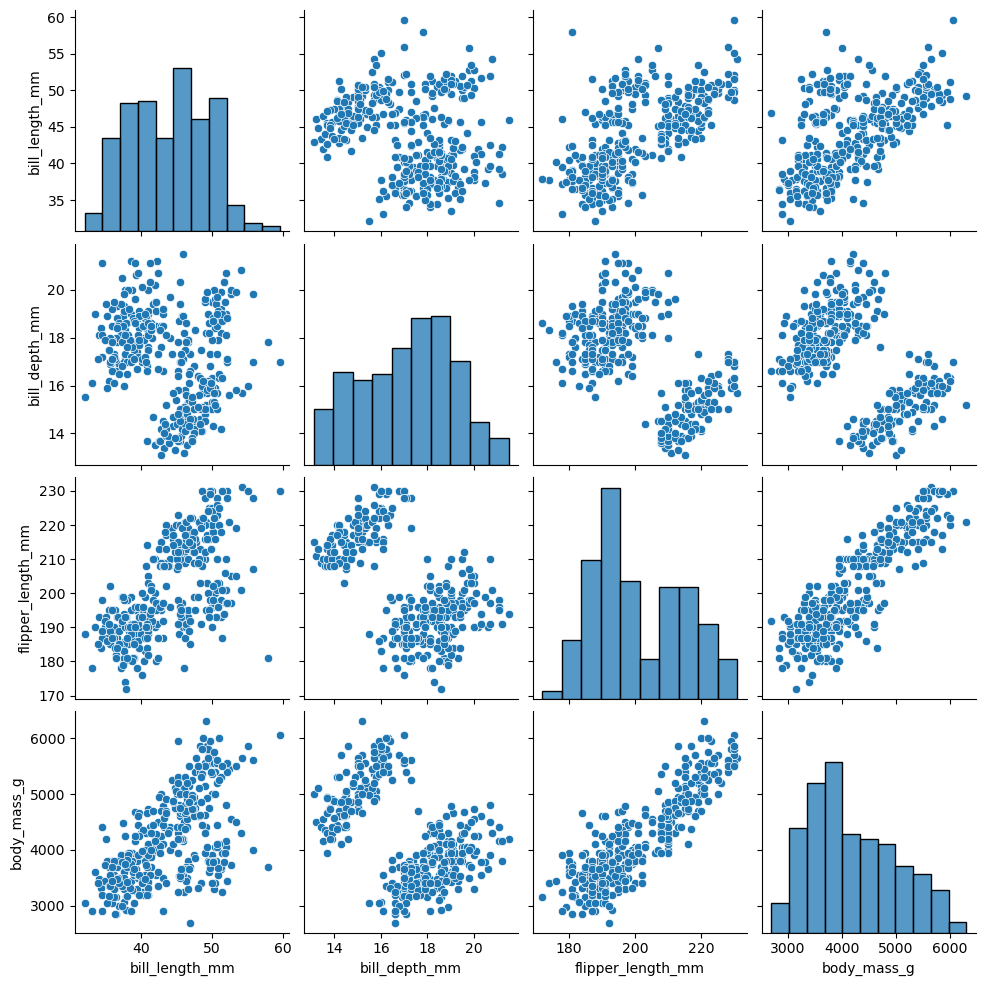

In [12]:
sns.pairplot(df, diag_kind="hist")

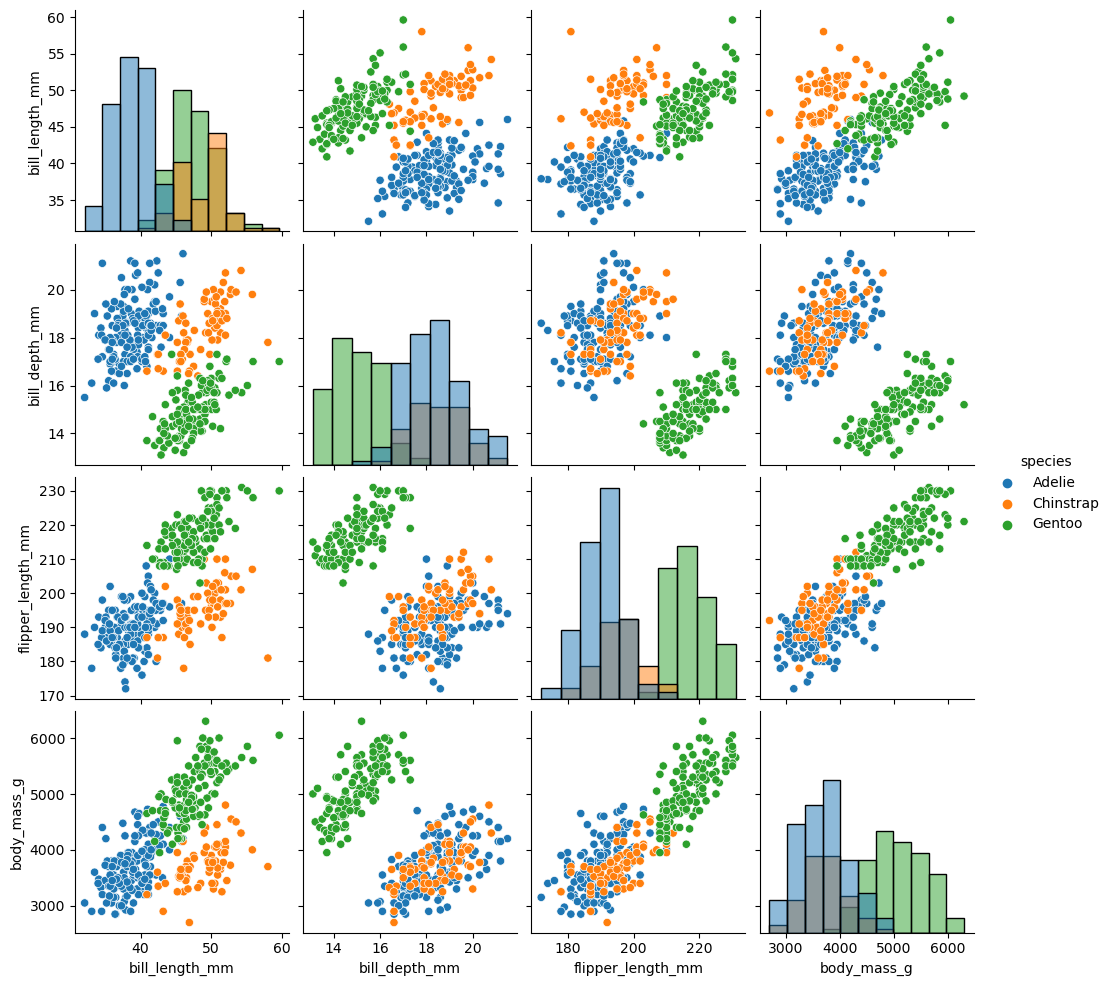

In [13]:
sns.pairplot(df, diag_kind="hist", hue = 'species')